# Numerai Prediction with Deep Learning - Model C

Solution : All features standardized by era and normalized before train the model. 

## Import relevant Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import gc
from numpy.random import seed
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Load data

In [2]:
train_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_training_data.csv')
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')
validation_data = tournament_data[tournament_data['data_type'] == 'validation' ]
del tournament_data
gc.collect()

22

## Preprocessing data

In [3]:
train_data['target_label'] = train_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})
validation_data['target_label'] = validation_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})

### a) Standardize by era and min-max scale

In [49]:
def scaled_by_era (data) :
    scaler = StandardScaler()
    s_data = pd.DataFrame(columns = data.columns.values[3:313])
    s_data['id'] = [] 
    for era in data['era'].unique() :
        scaled = pd.DataFrame(scaler.fit_transform(data.loc[data['era'] == era].iloc[:, 3:313]),
                          columns = data.columns.values[3:313])
        scaled['id'] = data.loc[data['era'] == era].iloc[:,0].reset_index(drop = True)
        s_data = s_data.append(scaled)

    s_data = s_data.reset_index(drop = True)
    
    scaled_data = pd.merge(data.iloc[:,0:3], s_data, on = 'id')
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    return scaled_data

def scaled_min_max (data) :
    scaler = MinMaxScaler()
    n_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 3:313].T).T)
    scaled_data = pd.concat([data.iloc[:,0:3],n_data], axis = 1)
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    scaled_data.columns = data.columns.values
    return scaled_data    

In [50]:
train_data_scaled_by_era = scaled_by_era(train_data)
train_data_scaled_by_era_min_max =  scaled_min_max(train_data_scaled_by_era)
train_data_scaled_by_era_min_max

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n000315175b67977,era1,train,0.127974,0.525768,0.326871,0.127974,0.525768,0.326871,0.326871,...,0.925223,0.731116,0.525768,0.727576,0.525768,0.936465,0.525768,0.725037,0.75,3
1,n0014af834a96cdd,era1,train,0.105937,0.105937,0.105937,0.263661,0.421385,0.105937,0.105937,...,0.738151,0.095705,0.096351,0.581418,0.263333,0.095705,0.261863,0.737424,0.25,1
2,n001c93979ac41d4,era1,train,0.277481,0.432702,0.277481,0.277481,0.743144,0.587923,0.587923,...,0.432702,0.112189,0.112825,0.432702,0.743791,0.112189,0.275711,0.588214,0.00,0
3,n0034e4143f22a13,era1,train,0.881594,0.192826,0.192826,0.537210,0.537210,0.365018,0.365018,...,0.883033,0.714988,0.714635,0.886635,0.882311,0.714988,0.885520,0.882240,0.00,0
4,n00679d1a636062f,era1,train,0.362430,0.362430,0.362430,0.362430,0.162364,0.362430,0.562495,...,0.763396,0.355940,0.562495,0.765489,0.161531,0.562495,0.360149,0.762935,0.75,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501803,nff6a8a8feaeeb52,era120,train,0.525259,0.525259,0.300219,0.075179,0.075179,0.525259,0.750300,...,0.525259,0.751299,0.525259,0.525259,0.750648,0.299220,0.296297,0.300219,0.25,1
501804,nff6af62a0996372,era120,train,0.916731,0.036923,0.036923,0.916731,0.476827,0.696779,0.696779,...,0.916926,0.918685,0.917217,0.917169,0.036243,0.697756,0.924398,0.916731,1.00,4
501805,nff9288983b8c040,era120,train,0.707473,0.495278,0.495278,0.495278,0.283083,0.495278,0.283083,...,0.707567,0.282141,0.920137,0.920090,0.920325,0.282141,0.063492,0.070888,0.00,0
501806,nffaab4e1cacc4b1,era120,train,0.229829,0.229829,0.229829,0.423791,0.035868,0.811714,0.811714,...,0.617838,0.618613,0.617966,0.617945,0.423791,0.423791,0.226449,0.617752,0.25,1


In [51]:
validation_data_scaled_by_era = scaled_by_era(validation_data)
validation_data_scaled_by_era_min_max = scaled_min_max(validation_data_scaled_by_era)
validation_data_scaled_by_era_min_max

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n0003aa52cab36c2,era121,validation,0.230639,0.608979,0.419809,0.419809,0.041468,0.608979,0.419809,...,0.609103,0.800867,0.609477,0.419809,0.419809,0.800867,0.033621,0.041303,0.00,0
1,n000920ed083903f,era121,validation,0.768664,0.579665,0.768664,0.957663,0.579665,0.201668,0.201668,...,0.579748,0.770022,0.958659,0.768871,0.579665,0.579665,0.579665,0.579665,0.25,1
2,n0038e640522c4a6,era121,validation,0.949716,0.032182,0.032182,0.949716,0.949716,0.949716,0.949716,...,0.032182,0.490949,0.260961,0.031680,0.031680,0.490949,0.490949,0.031981,1.00,4
3,n004ac94a87dc54b,era121,validation,0.620676,0.804187,0.804187,0.437164,0.070141,0.070141,0.070141,...,0.070141,0.067505,0.253169,0.069739,0.069739,0.067505,0.249846,0.253572,0.75,3
4,n0052fe97ea0c05f,era121,validation,0.261911,0.481698,0.481698,0.261911,0.921273,0.481698,0.481698,...,0.701630,0.038967,0.040966,0.701726,0.921754,0.038967,0.257352,0.921465,1.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56256,nffded7a83700b50,era132,validation,0.944688,0.037953,0.264636,0.037953,0.037953,0.944688,0.944688,...,0.264542,0.491320,0.491320,0.037764,0.945112,0.944923,0.030769,0.718098,0.50,2
56257,nfff0003d3b2d1bb,era132,validation,0.944590,0.263331,0.263331,0.944590,0.036245,0.944590,0.944590,...,0.263237,0.490418,0.944826,0.263237,0.717763,0.490418,0.029049,0.036057,1.00,4
56258,nfff7e9ae72371ed,era132,validation,0.944688,0.037953,0.037953,0.944688,0.037953,0.718004,0.718004,...,0.037764,0.037717,0.037717,0.264542,0.037717,0.037717,0.030769,0.037764,0.75,3
56259,nfff86fd0988b9b5,era132,validation,0.511602,0.511602,0.511602,0.293956,0.511602,0.511602,0.511602,...,0.293865,0.947119,0.729360,0.729338,0.729496,0.729360,0.069413,0.076129,0.50,2


### b) Inputs data and targets data

In [52]:

train_targets, train_inputs = np.array(train_data_scaled_by_era_min_max['target_label']),np.array(train_data_scaled_by_era_min_max.iloc[:,3:313])
validation_targets, validation_inputs = np.array(validation_data_scaled_by_era_min_max['target_label']), np.array(validation_data_scaled_by_era_min_max.iloc[:,3:313])


## Model

In [65]:
# need to run with the same results, set seed
seed(1)
tf.random.set_seed(1)

input_size = 310
output_size = 5
hidden_layer_size = 400
NUM_EPOCHS = 250
BATCH_SIZE = 64
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
                            ])

optimizer = tf.keras.optimizers.SGD(lr = 0.0001)
model.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_inputs,train_targets,
          batch_size = BATCH_SIZE,
          epochs = NUM_EPOCHS,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2)

Train on 501808 samples, validate on 56261 samples
Epoch 1/250
501808/501808 - 41s - loss: 1.6130 - accuracy: 0.2144 - val_loss: 1.6060 - val_accuracy: 0.2267
Epoch 2/250
501808/501808 - 41s - loss: 1.6046 - accuracy: 0.2249 - val_loss: 1.5988 - val_accuracy: 0.2347
Epoch 3/250
501808/501808 - 42s - loss: 1.5991 - accuracy: 0.2304 - val_loss: 1.5941 - val_accuracy: 0.2369
Epoch 4/250
501808/501808 - 43s - loss: 1.5953 - accuracy: 0.2335 - val_loss: 1.5907 - val_accuracy: 0.2399
Epoch 5/250
501808/501808 - 46s - loss: 1.5926 - accuracy: 0.2361 - val_loss: 1.5882 - val_accuracy: 0.2416
Epoch 6/250
501808/501808 - 47s - loss: 1.5904 - accuracy: 0.2382 - val_loss: 1.5862 - val_accuracy: 0.2437
Epoch 7/250
501808/501808 - 46s - loss: 1.5887 - accuracy: 0.2397 - val_loss: 1.5846 - val_accuracy: 0.2448
Epoch 8/250
501808/501808 - 47s - loss: 1.5873 - accuracy: 0.2412 - val_loss: 1.5833 - val_accuracy: 0.2454
Epoch 9/250
501808/501808 - 47s - loss: 1.5862 - accuracy: 0.2426 - val_loss: 1.5822 

Epoch 76/250
501808/501808 - 47s - loss: 1.5730 - accuracy: 0.2589 - val_loss: 1.5704 - val_accuracy: 0.2571
Epoch 77/250
501808/501808 - 47s - loss: 1.5729 - accuracy: 0.2590 - val_loss: 1.5704 - val_accuracy: 0.2573
Epoch 78/250
501808/501808 - 46s - loss: 1.5729 - accuracy: 0.2589 - val_loss: 1.5703 - val_accuracy: 0.2568
Epoch 79/250
501808/501808 - 46s - loss: 1.5728 - accuracy: 0.2591 - val_loss: 1.5703 - val_accuracy: 0.2572
Epoch 80/250
501808/501808 - 46s - loss: 1.5728 - accuracy: 0.2592 - val_loss: 1.5703 - val_accuracy: 0.2567
Epoch 81/250
501808/501808 - 47s - loss: 1.5728 - accuracy: 0.2590 - val_loss: 1.5703 - val_accuracy: 0.2565
Epoch 82/250
501808/501808 - 47s - loss: 1.5727 - accuracy: 0.2594 - val_loss: 1.5702 - val_accuracy: 0.2575
Epoch 83/250
501808/501808 - 46s - loss: 1.5727 - accuracy: 0.2592 - val_loss: 1.5702 - val_accuracy: 0.2565
Epoch 84/250
501808/501808 - 46s - loss: 1.5726 - accuracy: 0.2589 - val_loss: 1.5702 - val_accuracy: 0.2570
Epoch 85/250
501808

### Numerai score on train data 

In [66]:
def numerai_score(y_true, y_pred):
    rank_pred = y_pred.rank(pct = True, method = "first")
    return np.corrcoef(y_true, rank_pred)[0,1]

In [67]:
pred = model.predict(train_inputs)

train_data_pred = train_data.copy()
train_data_pred['prob 00'] =  pred[:,0]
train_data_pred['prob 25'] =  pred[:,1]
train_data_pred['prob 50'] =  pred[:,2]
train_data_pred['prob 75'] =  pred[:,3]
train_data_pred['prob 100'] =  pred[:,4]

train_data_pred['predicted'] = (train_data_pred['prob 00']*0 + 
                               train_data_pred['prob 25']*0.25 +
                               train_data_pred['prob 50']*0.50 +
                               train_data_pred['prob 75']*0.75 +
                               train_data_pred['prob 100']*1.00)

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

numerai score on train data :  0.04798


### Numerai score on validation data

In [68]:
pred = model.predict(validation_inputs)

validation_data_pred = validation_data.copy()
validation_data_pred['prob 00'] =  pred[:,0]
validation_data_pred['prob 25'] =  pred[:,1]
validation_data_pred['prob 50'] =  pred[:,2]
validation_data_pred['prob 75'] =  pred[:,3]
validation_data_pred['prob 100'] =  pred[:,4]

validation_data_pred['predicted'] = (validation_data_pred['prob 00']*0 + 
                               validation_data_pred['prob 25']*0.25 +
                               validation_data_pred['prob 50']*0.50 +
                               validation_data_pred['prob 75']*0.75 +
                               validation_data_pred['prob 100']*1.00)

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

numerai score on validation data :  0.02638


### Correlation and consistency on validation data

In [69]:
consistant = 0
corr = []
era = []
for i in validation_data_pred['era'].unique() :
    data = validation_data_pred[validation_data_pred['era'] == i]
    score = round(numerai_score(data['target_kazutsugi'],data['predicted']),5)
    if score > 0 :
        consistant = consistant + 1
    else :
        consistant = consistant  
    
    era.append(i)
    corr.append(score)
    
correlation_table = pd.DataFrame(data = [corr], columns = era)
mean = correlation_table.mean(axis = 1)
sd = correlation_table.std(axis = 1)
correlation_table['Mean'] = mean
correlation_table['SD'] = sd


## Result

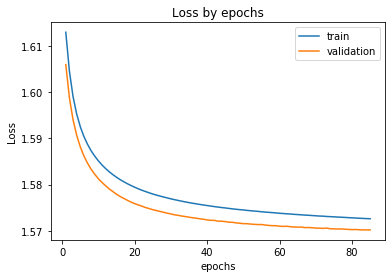

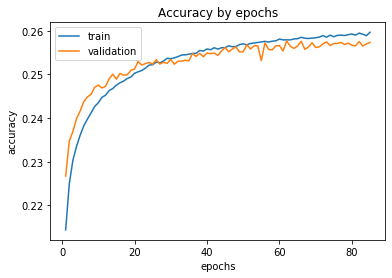

numerai score on train data :  0.04798
numerai score on validation data :  0.02638
Consistant :  1.0
Summary on validation data by era


,era121,era122,era123,era124,era125,era126,era127,era128,era129,era130,era131,era132,Mean,SD
0,0.00852,0.02178,0.03555,0.03105,0.0318,0.01562,0.00091,0.04512,0.01945,0.02187,0.022,0.06199,0.026305,0.016367


In [70]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']
plt.plot(range(1,len(loss)+1), loss, label = 'train')
plt.plot(range(1,len(loss)+1), val_loss, label = 'validation')
plt.title('Loss by epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1,len(loss)+1), accuracy, label = 'train')
plt.plot(range(1,len(loss)+1), val_accuracy, label = 'validation')
plt.title('Accuracy by epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

print ('Consistant : ', round(consistant/12,5))
print ('Summary on validation data by era')

correlation_table 

## Save Selected Model

In [72]:
model.save('model_C')      # Now model saved in the name of model_C

INFO:tensorflow:Assets written to: model_C/assets


## Finish model building........and start to predict with tournament data

## Predicting

#### 1) Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import gc
from numpy.random import seed
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### 2) Load tournament data

In [2]:
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')

#### 3} Preprocessing - label and standardize by era

In [3]:
tournament_data['target_label'] = np.nan

def scaled_by_era (data) :
    scaler = StandardScaler()
    s_data = pd.DataFrame(columns = data.columns.values[3:313])
    s_data['id'] = [] 
    for era in data['era'].unique() :
        scaled = pd.DataFrame(scaler.fit_transform(data.loc[data['era'] == era].iloc[:, 3:313]),
                          columns = data.columns.values[3:313])
        scaled['id'] = data.loc[data['era'] == era].iloc[:,0].reset_index(drop = True)
        s_data = s_data.append(scaled)

    s_data = s_data.reset_index(drop = True)
    scaled_data = pd.merge(data.iloc[:,0:3],s_data, on = 'id')
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    return scaled_data

def scaled_min_max (data) :
    scaler = MinMaxScaler()
    n_data = pd.DataFrame(scaler.fit_transform(data.iloc[:, 3:313].T).T)
    scaled_data = pd.concat([data.iloc[:,0:3],n_data], axis = 1)
    scaled_data['target_kazutsugi'] = data['target_kazutsugi']
    scaled_data['target_label'] = data['target_label']
    scaled_data.columns = data.columns.values
    return scaled_data    

tournament_data_scaled_by_era = scaled_by_era(tournament_data)
tournament_data_scaled_by_era_min_max = scaled_min_max(tournament_data_scaled_by_era)
tournament_data_scaled_by_era_min_max

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,target_label
0,n0003aa52cab36c2,era121,validation,0.230639,0.608979,0.419809,0.419809,0.041468,0.608979,0.419809,...,0.609103,0.800867,0.609477,0.419809,0.419809,0.800867,0.033621,0.041303,0.00,NaN
1,n000920ed083903f,era121,validation,0.768664,0.579665,0.768664,0.957663,0.579665,0.201668,0.201668,...,0.579748,0.770022,0.958659,0.768871,0.579665,0.579665,0.579665,0.579665,0.25,NaN
2,n0038e640522c4a6,era121,validation,0.949716,0.032182,0.032182,0.949716,0.949716,0.949716,0.949716,...,0.032182,0.490949,0.260961,0.031680,0.031680,0.490949,0.490949,0.031981,1.00,NaN
3,n004ac94a87dc54b,era121,validation,0.620676,0.804187,0.804187,0.437164,0.070141,0.070141,0.070141,...,0.070141,0.067505,0.253169,0.069739,0.069739,0.067505,0.249846,0.253572,0.75,NaN
4,n0052fe97ea0c05f,era121,validation,0.261911,0.481698,0.481698,0.261911,0.921273,0.481698,0.481698,...,0.701630,0.038967,0.040966,0.701726,0.921754,0.038967,0.257352,0.921465,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676026,nffbb4995cb07742,eraX,live,0.035608,0.035608,0.266287,0.266287,0.035608,0.727646,0.727646,...,0.496878,0.496967,0.496878,0.265706,0.034759,0.496967,0.496878,0.496878,NaN,NaN
1676027,nffbf96bdd6b3ee3,eraX,live,0.735001,0.278448,0.050171,0.963277,0.278448,0.506724,0.506724,...,0.049109,0.049286,0.049109,0.049109,0.277983,0.049286,0.986639,0.049773,NaN,NaN
1676028,nffcce807fb53a41,eraX,live,0.742909,0.027309,0.027309,0.981442,0.504375,0.027309,0.027309,...,0.026199,0.026384,0.026199,0.026199,0.265357,0.026384,0.504283,0.026893,NaN,NaN
1676029,nffd0e48b79bfe80,eraX,live,0.488557,0.028944,0.028944,0.718363,0.258750,0.028944,0.028944,...,0.949061,0.028053,0.027874,0.949061,0.948838,0.028053,0.730078,0.948392,NaN,NaN


In [4]:
tournament_targets, tournament_inputs = np.array(tournament_data_scaled_by_era_min_max['target_label']),np.array(tournament_data_scaled_by_era_min_max.iloc[:,3:313])

#### 4)  Load Model

In [5]:
model_C = tf.keras.models.load_model('model_C')

#### 5) Predict

In [6]:
pred = model_C.predict(tournament_inputs)

tournament_data_pred = tournament_data.copy()
tournament_data_pred['prob 00'] =  pred[:,0]
tournament_data_pred['prob 25'] =  pred[:,1]
tournament_data_pred['prob 50'] =  pred[:,2]
tournament_data_pred['prob 75'] =  pred[:,3]
tournament_data_pred['prob 100'] =  pred[:,4]

tournament_data_pred['predicted'] = (tournament_data_pred['prob 00']*0 + 
                               tournament_data_pred['prob 25']*0.25 +
                               tournament_data_pred['prob 50']*0.50 +
                               tournament_data_pred['prob 75']*0.75 +
                               tournament_data_pred['prob 100']*1.00)


#### 6) Make submission

In [7]:
submission = pd.DataFrame(tournament_data_pred['id'])
submission['prediction_kazutsugi'] = tournament_data_pred['predicted']
submission

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.485366
1,n000920ed083903f,0.471242
2,n0038e640522c4a6,0.570091
3,n004ac94a87dc54b,0.512026
4,n0052fe97ea0c05f,0.512613
...,...,...
1676026,nffbb4995cb07742,0.468666
1676027,nffbf96bdd6b3ee3,0.532302
1676028,nffcce807fb53a41,0.515324
1676029,nffd0e48b79bfe80,0.516164


#### 7) Save submission

In [8]:
submission.to_csv('submission_model_C.csv', index = False)